In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline




In [3]:
thunder_3y = pd.read_csv('../datasets/thunder/tc_3yr_4com.csv')
thunder_2y = pd.read_csv('../datasets/thunder/tc_2yr_4com.csv')
thunder_1y = pd.read_csv('../datasets/thunder/tc_1yr_4com.csv')

In [4]:
bulls_3y = pd.read_csv('../datasets/bulls/bc_3yrs_4com.csv')
bulls_2y = pd.read_csv('../datasets/bulls/bc_2yrs_4com.csv')
bulls_1y = pd.read_csv('../datasets/bulls/bc_1yrs_4com.csv')

In [5]:
thunder_1y['timeframe']='1_yr'
thunder_2y['timeframe']='2_yr'
thunder_3y['timeframe']='3_yr'
thunder_df = pd.concat([thunder_1y,thunder_2y,thunder_3y])

In [6]:
bulls_1y['timeframe']='1_yr'
bulls_2y['timeframe']='2_yr'
bulls_3y['timeframe']='3_yr'
bulls_df = pd.concat([bulls_3y,bulls_2y,bulls_1y])

In [7]:
sia = SentimentIntensityAnalyzer()

In [8]:
thunder_df['is_thunder'] = 'Thunder'
bulls_df['is_thunder'] = 'Bulls'

In [9]:
combined_df = pd.concat([thunder_df,bulls_df])

In [10]:
c_corp = list(combined_df['body+title'])

In [11]:
#adapted from a Heather Robbins lesson
dicts = []    

for post in c_corp:
    scores = sia.polarity_scores(post)
    scores['body+text'] = post
    dicts.append(scores)

c_sent = pd.DataFrame(dicts)
c_sent.head()

,body+text,compound,neg,neu,pos
0,"One year ago, Paul George brought tears to our...",0.9468,0.036,0.571,0.393
1,Won't happen lineup that i want to happen. [de...,0.0772,0.000,0.843,0.157
2,Deonte Burton putting on a CLINIC and hitting ...,0.5859,0.000,0.774,0.226
3,[Question] Mavs fan coming in peace What's the...,0.5705,0.054,0.797,0.149
4,No more thicc Burton our boy got slim and look...,0.5399,0.105,0.670,0.224


In [12]:
c_sent['Subreddit']=combined_df['is_thunder'].values

Text(0.5, 1.0, 'Comparison Between\nBulls and Thunder Subreddits')

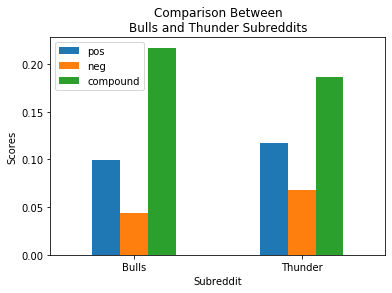

In [13]:
c_sent.groupby('Subreddit').mean()[['pos', 'neg', 'compound']]\
.plot(kind='bar')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.title('Comparison Between\nBulls and Thunder Subreddits')

In [ ]:
#Seeing if there is a statistical difference in sentiment scores

In [23]:
stats.f_oneway(c_sent['pos'][c_sent['Subreddit']=='Thunder'],
               c_sent['pos'][c_sent['Subreddit']=='Bulls'],
              )

F_onewayResult(statistic=121.23938385915115, pvalue=3.9404516734805193e-28)

In [24]:
stats.f_oneway(c_sent['neg'][c_sent['Subreddit']=='Thunder'],
               c_sent['neg'][c_sent['Subreddit']=='Bulls'],
              )

F_onewayResult(statistic=332.6928632196224, pvalue=7.645911937842811e-74)

In [25]:
stats.f_oneway(c_sent['compound'][c_sent['Subreddit']=='Thunder'],
               c_sent['compound'][c_sent['Subreddit']=='Bulls'],
              )

F_onewayResult(statistic=24.707244747622905, pvalue=6.718112541321712e-07)

In [ ]:
#performing sentiment analysis over time on the Thunder Subreddit

In [14]:
thunder_corp = list(thunder_df['body+title'])

In [15]:

dicts = []    

for post in thunder_corp:
    scores = sia.polarity_scores(post)
    scores['body+text'] = post
    dicts.append(scores)

c_thunder_sent = pd.DataFrame(dicts)
c_thunder_sent.head()

,body+text,compound,neg,neu,pos
0,"One year ago, Paul George brought tears to our...",0.9468,0.036,0.571,0.393
1,Won't happen lineup that i want to happen. [de...,0.0772,0.000,0.843,0.157
2,Deonte Burton putting on a CLINIC and hitting ...,0.5859,0.000,0.774,0.226
3,[Question] Mavs fan coming in peace What's the...,0.5705,0.054,0.797,0.149
4,No more thicc Burton our boy got slim and look...,0.5399,0.105,0.670,0.224


In [16]:
c_thunder_sent['timeframe']=thunder_df['timeframe'].values

In [17]:
X=c_thunder_sent.drop(['body+text','neu','timeframe'],axis=1).columns

c_thunder_sent[X].mean()

compound    0.186868
neg         0.068143
pos         0.117678
dtype: float64

Text(0, 0.5, 'Scores')

<Figure size 144x144 with 0 Axes>

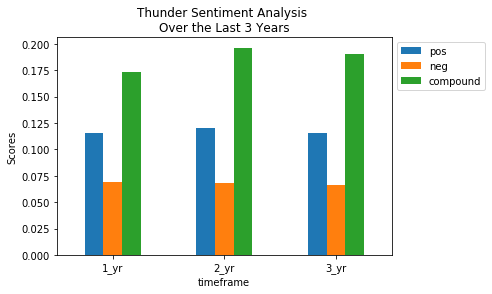

In [18]:
plt.figure(figsize=(2,2))
c_thunder_sent.groupby('timeframe').mean()[['pos', 'neg', 'compound']]\
.plot(kind='bar')

plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.xticks(rotation=0)
plt.title('Thunder Sentiment Analysis \nOver the Last 3 Years')
plt.ylabel("Scores")

In [19]:
import scipy.stats as stats

In [20]:
stats.f_oneway(c_thunder_sent['pos'][c_thunder_sent['timeframe']=='1_yr'],
              c_thunder_sent['pos'][c_thunder_sent['timeframe']=='2_yr'],
              c_thunder_sent['pos'][c_thunder_sent['timeframe']=='3_yr'])

F_onewayResult(statistic=1.7124639372146482, pvalue=0.18046234402713243)

In [21]:
stats.f_oneway(c_thunder_sent['neg'][c_thunder_sent['timeframe']=='1_yr'],
              c_thunder_sent['neg'][c_thunder_sent['timeframe']=='2_yr'],
              c_thunder_sent['neg'][c_thunder_sent['timeframe']=='3_yr'])

F_onewayResult(statistic=0.49693862737090155, pvalue=0.608402146939334)

In [22]:
stats.f_oneway(c_thunder_sent['compound'][c_thunder_sent['timeframe']=='1_yr'],
              c_thunder_sent['compound'][c_thunder_sent['timeframe']=='2_yr'],
              c_thunder_sent['compound'][c_thunder_sent['timeframe']=='3_yr'])

F_onewayResult(statistic=2.403399319152795, pvalue=0.0904512047212565)